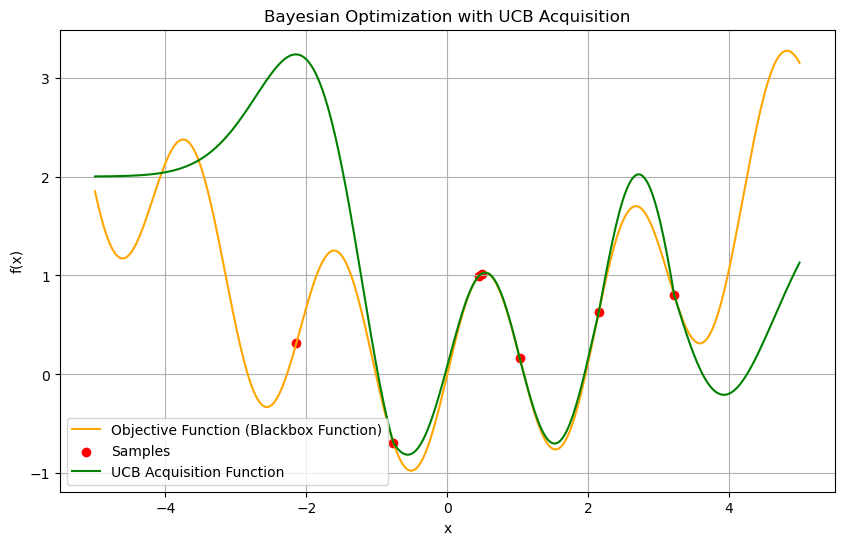

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
def objective_function(x): # Blackbox Function
    return np.sin(3 * x) + 0.1 * x ** 2
def ucb(x, gp_model, kappa): # Acquisition function (using Upper Confidence Bound)
    mean, std = gp_model.predict(x.reshape(-1, 1), return_std=True)
    return mean + kappa * std
x = np.linspace(-5, 5, 400)
np.random.seed(0)
x_samples = np.random.uniform(-5, 5, size=5)
y_samples = objective_function(x_samples)
kappa = 2.0  # UCB exploration parameter
num_iterations = 2
for i in range(num_iterations):
    gp_model = GaussianProcessRegressor().fit(x_samples.reshape(-1, 1), y_samples) # Fit a GP model to the available data
    acquisition_values = ucb(x, gp_model, kappa) # Calculate the UCB acquisition values for the search space
    next_x = x[np.argmax(acquisition_values)] # Select the next point to evaluate based on the maximum acquisition value
    next_y = objective_function(next_x) # Evaluate the objective function at the selected point
    # Update the samples with the new evaluation
    x_samples = np.append(x_samples, next_x)
    y_samples = np.append(y_samples, next_y)
plt.figure(figsize=(10, 6))
plt.plot(x, objective_function(x), color= 'orange', label='Objective Function (Blackbox Function)')
plt.scatter(x_samples, y_samples, color='red', marker='o', label='Samples')
plt.plot(x, ucb(x, gp_model, kappa), color='green', label='UCB Acquisition Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bayesian Optimization with UCB Acquisition')
plt.legend()
plt.grid(True)
plt.show()